Medical datasets

- what is most reliable feature to use for classification?
- what features could be removed to reduce the dimensionality of the data?


In [267]:
import pandas as pd
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-darkgrid')

%matplotlib widget

In [268]:
cardio_df = pd.read_csv('cardio_train.csv', delimiter=';')

#cardio.set_index('id', inplace=True)
cardio_df.drop(['id'], axis=1, inplace=True)
# cardio_df.info()
cardio_df['age'] = round(cardio_df['age']/365, 0)
cardio_df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0


In [269]:
categorical_cols = [col for col in list(cardio_df.columns[:-1]) if cardio_df[col].unique().shape[0] < 10]
numerical_cols = [col for col in list(cardio_df.columns[:-1]) if cardio_df[col].unique().shape[0] > 10]
target_col = list(cardio_df.columns)[-1]



In [270]:
cardio_df[numerical_cols].describe()

,age,height,weight,ap_hi,ap_lo
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.338686,164.359229,74.205690,128.817286,96.630414
std,6.765294,8.210126,14.395757,154.011419,188.472530
min,30.000000,55.000000,10.000000,-150.000000,-70.000000
25%,48.000000,159.000000,65.000000,120.000000,80.000000
50%,54.000000,165.000000,72.000000,120.000000,80.000000
75%,58.000000,170.000000,82.000000,140.000000,90.000000
max,65.000000,250.000000,200.000000,16020.000000,11000.000000


In [271]:
# cardio_df[cardio_df['ap_hi'] < 0]['ap_hi'] = cardio_df[cardio_df['ap_hi'] < 0]['ap_hi'].abs()
cardio_df[numerical_cols] = cardio_df[numerical_cols].apply((lambda x: abs(x)))
cardio_df[numerical_cols].describe()

,age,height,weight,ap_hi,ap_lo
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.338686,164.359229,74.205690,128.841429,96.632414
std,6.765294,8.210126,14.395757,153.991223,188.471505
min,30.000000,55.000000,10.000000,1.000000,0.000000
25%,48.000000,159.000000,65.000000,120.000000,80.000000
50%,54.000000,165.000000,72.000000,120.000000,80.000000
75%,58.000000,170.000000,82.000000,140.000000,90.000000
max,65.000000,250.000000,200.000000,16020.000000,11000.000000


In [272]:
def nullifying (df, col):
    col1 = df[col].describe()
    Q1 = col1['25%']
    Q3 = col1['75%']
    IQR = Q3 - Q1
    if col == 'ap_lo':
        max_range = Q3 + 2*IQR
        min_range = Q1 - 2*IQR
    elif col == 'ap_hi':
        max_range = Q3 + 1.5*IQR
        min_range = Q1 - 1.5*IQR
    df[col] = df[col].apply((lambda x: np.nan if x > max_range or x < min_range else x))


In [273]:
nullifying(cardio_df, 'ap_lo')
nullifying(cardio_df, 'ap_hi')

In [283]:
cardio_df[numerical_cols].describe()

,age,height,weight,ap_hi,ap_lo
count,70000.000000,70000.000000,70000.000000,68572.000000,68544.000000
mean,53.338686,164.359229,74.205690,126.180336,81.217845
std,6.765294,8.210126,14.395757,15.397792,9.055639
min,30.000000,55.000000,10.000000,90.000000,60.000000
25%,48.000000,159.000000,65.000000,120.000000,80.000000
50%,54.000000,165.000000,72.000000,120.000000,80.000000
75%,58.000000,170.000000,82.000000,140.000000,90.000000
max,65.000000,250.000000,200.000000,170.000000,110.000000


In [274]:
cardio_df['ap_hi'].min()

90.0

In [285]:
cardio_df.isna().sum()

age               0
gender            0
height            0
weight            0
ap_hi          1428
ap_lo          1456
cholesterol       0
gluc              0
smoke             0
alco              0
active            0
cardio            0
dtype: int64

In [286]:
cardio_df['ap_hi'].isna().sum()/ len(cardio_df['ap_hi'])
# save to drop both of nan values

0.0204

In [287]:
cardio_df.dropna(inplace=True)

In [288]:
cardio_df.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [310]:
ratios_required = cardio_df['cardio'].value_counts()/len(cardio_df)*100
ratios_required

0    51.035955
1    48.964045
Name: cardio, dtype: float64

In [342]:
def sample_with_ratio(df,ratios_required):
    for i in range (0,150):
        df1  = cardio_df
        ratio_fixer = 0
        df_sample = df1.sample(frac=0.1, replace=True, random_state=i)
        
        ratio = df_sample['cardio'].value_counts()/len(cardio_df)*1000
        if round(ratio[1],2) == ratios_required[1]:
            ratio_fixer = i
            break
    print(i)
    return df1.sample(frac=0.1, replace=False, random_state=ratio_fixer)

In [343]:
df_sample = sample_with_ratio(cardio_df, ratios_required)

149


In [344]:
df_sample

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
42899,56.0,1,155,88.0,160.0,90.0,1,1,0,0,1,1
69410,61.0,1,157,61.0,110.0,70.0,1,1,0,0,1,1
14226,56.0,1,161,100.0,140.0,80.0,3,3,0,0,1,1
22949,54.0,2,168,67.0,130.0,90.0,1,1,0,0,0,0
18828,45.0,1,169,73.0,150.0,100.0,2,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
37621,52.0,2,178,75.0,120.0,80.0,1,1,0,0,1,0
62548,54.0,1,167,65.0,120.0,80.0,1,1,0,0,1,0
34339,41.0,2,170,68.0,120.0,80.0,1,1,0,0,0,0
53067,52.0,2,170,68.0,130.0,90.0,1,1,0,0,0,0


In [345]:
df_sample[df_sample.columns[:-1]]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
42899,56.0,1,155,88.0,160.0,90.0,1,1,0,0,1
69410,61.0,1,157,61.0,110.0,70.0,1,1,0,0,1
14226,56.0,1,161,100.0,140.0,80.0,3,3,0,0,1
22949,54.0,2,168,67.0,130.0,90.0,1,1,0,0,0
18828,45.0,1,169,73.0,150.0,100.0,2,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
37621,52.0,2,178,75.0,120.0,80.0,1,1,0,0,1
62548,54.0,1,167,65.0,120.0,80.0,1,1,0,0,1
34339,41.0,2,170,68.0,120.0,80.0,1,1,0,0,0
53067,52.0,2,170,68.0,130.0,90.0,1,1,0,0,0


In [323]:
df_sample[df_sample.columns[1]]

45228    2
44244    2
47637    1
22055    1
43601    2
        ..
5293     1
41914    1
66705    2
48392    2
21662    2
Name: gender, Length: 6747, dtype: int64

In [346]:
df_sample[df_sample.index.duplicated()]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


array([<AxesSubplot:xlabel='age', ylabel='height'>], dtype=object)

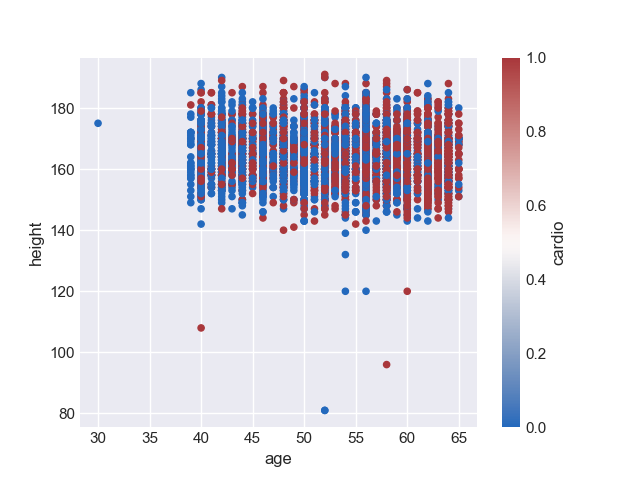

In [336]:
df_sample.plot(kind='scatter', x= df_sample[numerical_cols].columns[0],y=df_sample[numerical_cols].columns[1], c='cardio', cmap = 'vlag', subplots= True)

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


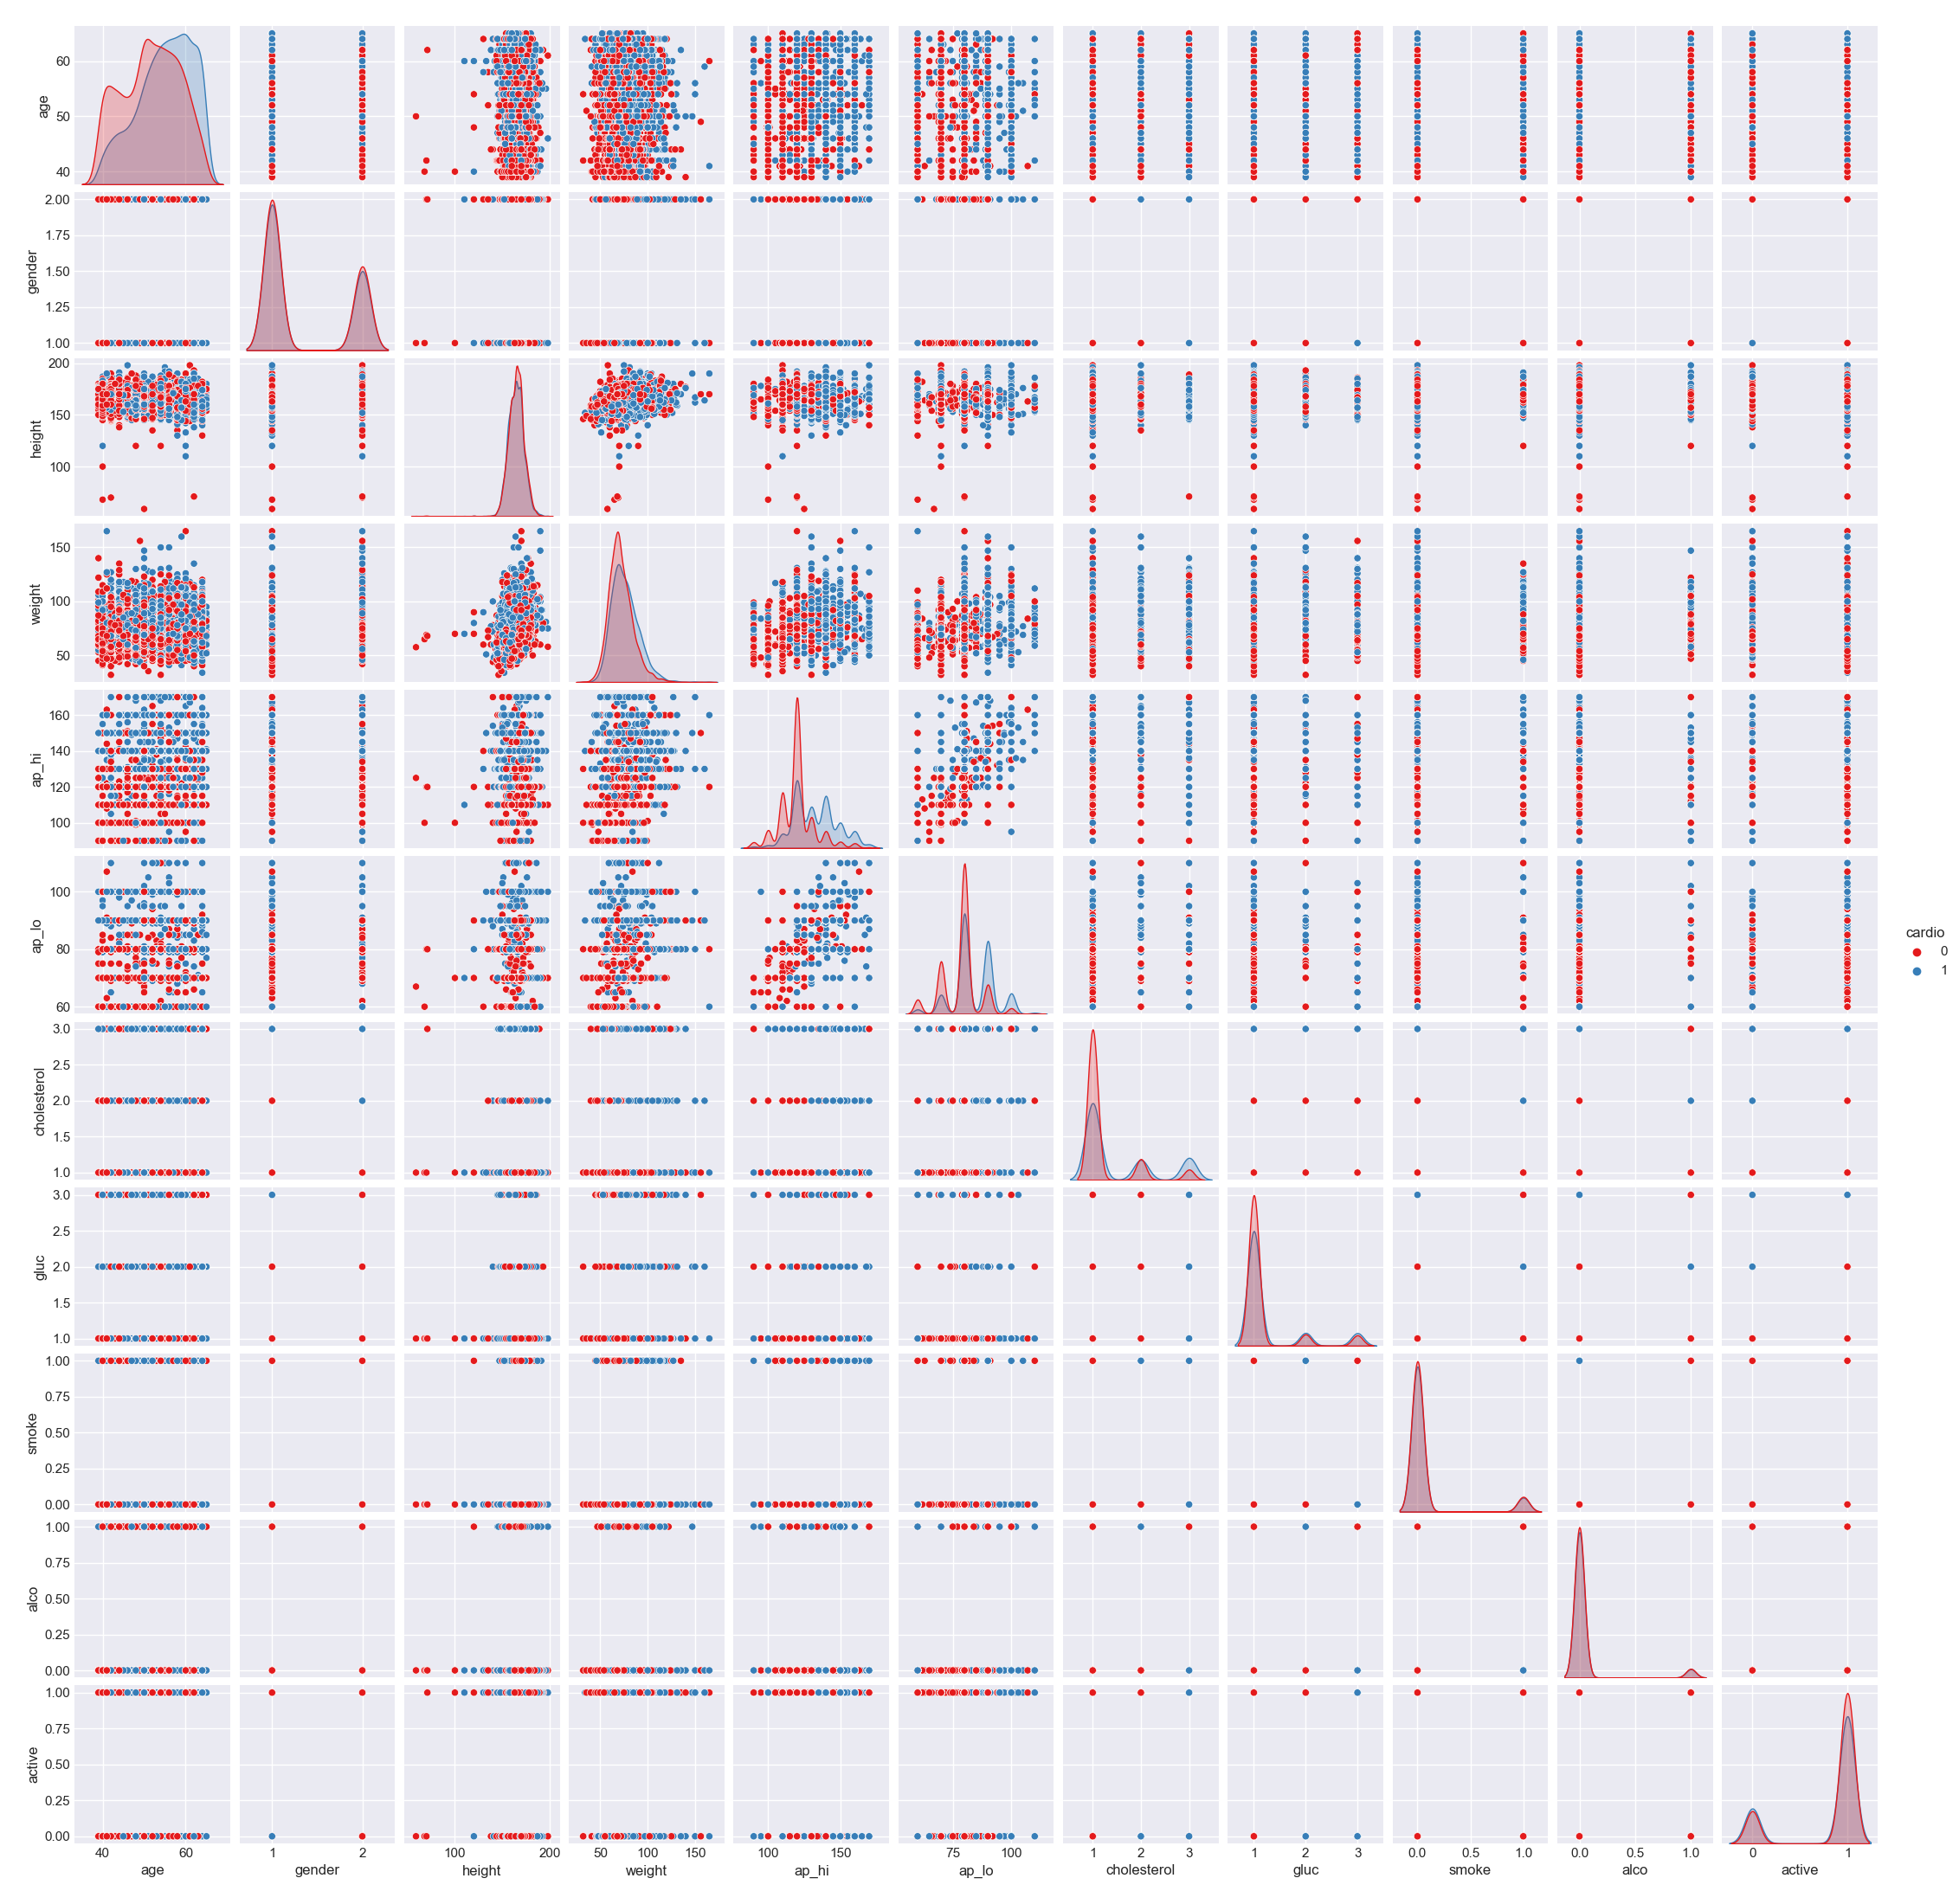

In [348]:
sns.pairplot(df_sample, hue='cardio', palette='Set1', diag_kind='kde', size=2);

<AxesSubplot:xlabel='ap_hi', ylabel='ap_lo'>

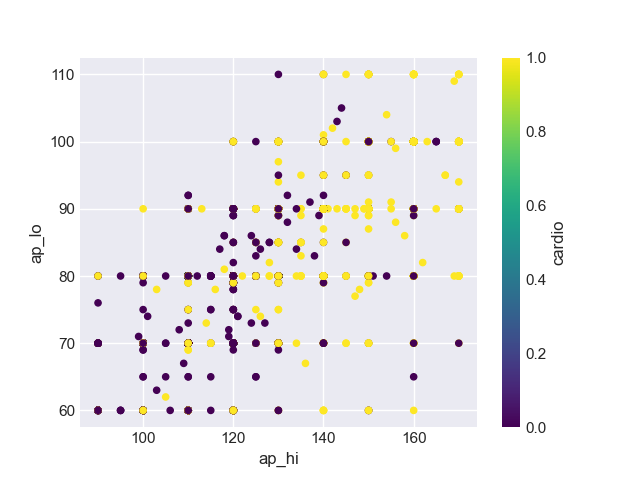

In [297]:
df_sample.plot.scatter(x='ap_hi', y='ap_lo', c='cardio', cmap = 'viridis')